# Predict whether a customer will be granted a loan

# Load and take a look at the data

In [168]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [169]:
# Load data
ds=pd.read_csv('loan_prediction.csv')

In [170]:
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [171]:
ds.shape

(614, 13)

In [172]:
ds.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Check and treat null values

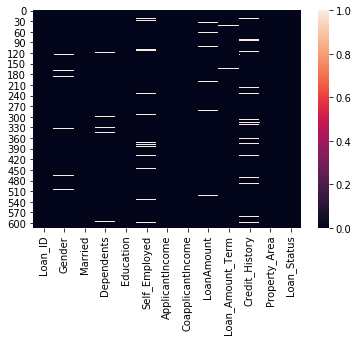

In [173]:
sns.heatmap(ds.isnull())

In [174]:
ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Remove rows with unknown values

In [175]:
ds.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [176]:
ds = ds[ds['Credit_History'].notna()]

In [177]:
ds = ds[ds['Self_Employed'].notna()]

In [178]:
ds = ds[ds['LoanAmount'].notna()]

In [179]:
ds = ds[ds['Dependents'].notna()]

In [180]:
ds = ds[ds['Gender'].notna()]

In [181]:
ds = ds[ds['Loan_Amount_Term'].notna()]

In [182]:
ds.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [183]:
ds.shape

(480, 13)

# Check correlation

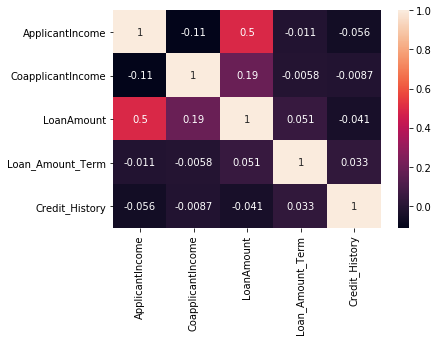

In [184]:
dscor=ds.corr()
sns.heatmap(dscor, annot=True)

# Summary statistics

In [185]:
ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


# Data visualizations

In [186]:
ds.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [187]:
# Count loans granted
ds.groupby('Loan_Status')['Loan_Status'].count()

Loan_Status
N    148
Y    332
Name: Loan_Status, dtype: int64

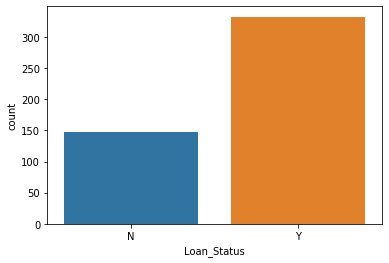

In [188]:
sns.countplot(ds['Loan_Status'])

The ratio of loans granted to not is roughly 2:1

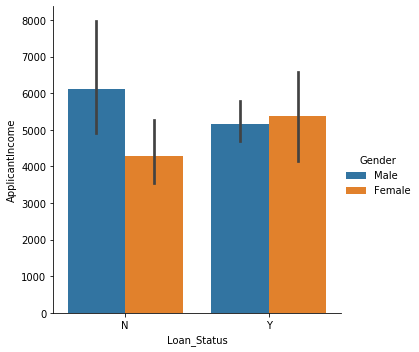

In [189]:
sns.catplot(x='Loan_Status', y= 'ApplicantIncome', hue='Gender', data=ds, kind='bar')

Males are more likely not to be granted a loan, even if they have higher incomes. Females are less likely to be granted a loan if they have lower incomes.

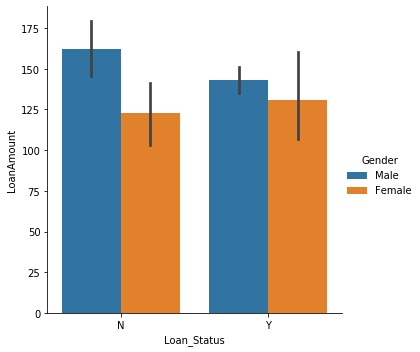

In [190]:
sns.catplot(x='Loan_Status', y= 'LoanAmount', hue='Gender', data=ds, kind='bar')

Males generally ask for larger loans. Larger loans are less likely to be granted, especially to males.

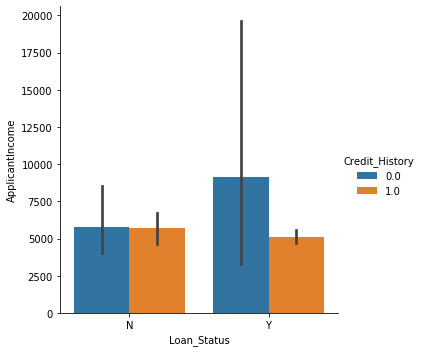

In [191]:
sns.catplot(x='Loan_Status', y= 'ApplicantIncome', hue='Credit_History', data=ds, kind='bar')

Men who do not have a good credit history but have a high income are more likely to be granted a loan.

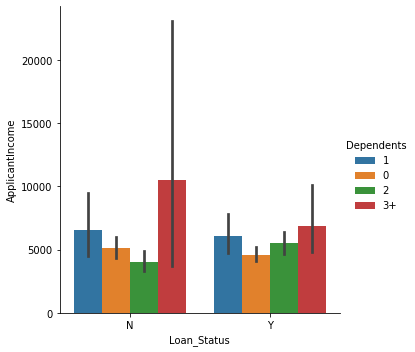

In [192]:
sns.catplot(x='Loan_Status', y= 'ApplicantIncome', hue='Dependents', data=ds, kind='bar')

People with 1 or 3 dependants generally have higher incomes, but are also more likely to be denied a loan.

# Check eveness of dataset

In [193]:
loan_counts = ds['Loan_Status'].value_counts()
loan_counts

Y    332
N    148
Name: Loan_Status, dtype: int64

In [194]:
loan_percentage = ds['Loan_Status'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
loan_percentage

Y    69.2%
N    30.8%
Name: Loan_Status, dtype: object

The data is not distributed evenly over the target column and it will affect the accuracy score of the classification models.

# Encode categorical columns to numeric values

In [195]:
ds.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [196]:
ds.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [197]:
eds=ds

In [198]:
# Change categorical data to numerical data for 2 categoriacl columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area', 'Loan_Status']
for col in cols:
    ds[col] = le.fit_transform(ds[col])

In [199]:
eds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


# Check correlation after encoding

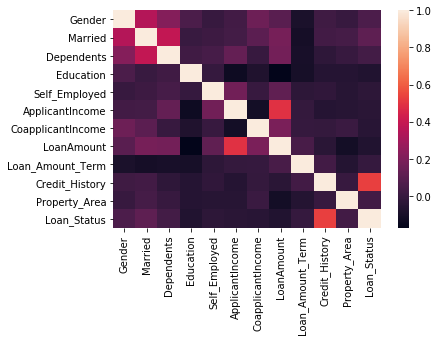

In [200]:
edscor=eds.corr()
sns.heatmap(edscor)

Credit history is by far the feature that correlates the best with the target column, followed by their marital status.

Trailing behind them:
        Gender, Dependants, self emloyed, Applicant income

Using only one parameter with logistc regression won't work so we will include the best ones after HC.

# Drop irrelevant columns

In [201]:
eds.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [202]:
# Drop irrelevant (poorly correlated) columns - dataset renamed to nds (new dataset)
nds=ds.drop(columns=['Loan_ID',  'Education', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Property_Area'])

# Find and remove outliers

In [203]:
nds.shape

(480, 7)

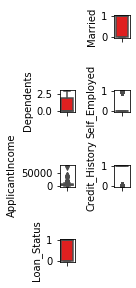

In [204]:
# Show boxplots for all columns, check outliers
collist=nds.columns.values
ncol=2
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(nds[collist[i]], color='red', orient='v')
    plt.tight_layout()

In [205]:
# Remove outliers - dataset renamed to cds (clean dataset)
from scipy import stats
from scipy.stats import zscore

z_score=abs(zscore(nds))
print(nds.shape)
cds=nds.loc[(z_score<3).all(axis=1)]
print(cds.shape)

(480, 7)
(475, 7)


# Check and adjust skewness

Ran both a log and sigmoid but they had no effect.

# Split data into x and y

In [206]:
cds.columns

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'ApplicantIncome',
       'Credit_History', 'Loan_Status'],
      dtype='object')

In [207]:
# Lineup target and input values
cds_x=cds.drop(columns=['Loan_Status'])
y=cds[['Loan_Status']]

# Apply scaler

In [208]:
#Scaling for linear regression
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(cds_x)
x=pd.DataFrame(x,columns=cds_x.columns)

In [209]:
x.skew()

Gender            -1.661856
Married           -0.613996
Dependents         0.950248
Self_Employed      2.120046
ApplicantIncome    2.110552
Credit_History    -2.044198
dtype: float64

# Train-Test split

In [210]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=55, test_size=0.20)

# Model

In [211]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [212]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [213]:
from sklearn.model_selection import cross_val_score

Using GridSearchCV to select the best parameter¶

In [214]:
# best parameters for logistic Regression

from sklearn.model_selection import GridSearchCV
lg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'penalty': 'l2'}

In [215]:
# Best parameters for DecisionTree

dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dt,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}

In [216]:
# Best parameters for KNeighborsClassifier

kn=KNeighborsClassifier()
parameters={'n_neighbors':(1,30)}
gd=GridSearchCV(kn,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 30}

# Logistic Regression and binary classification methods

In [226]:
KNN=KNeighborsClassifier(n_neighbors= 30)

LR=LogisticRegression(penalty='l2')
DT=DecisionTreeClassifier(criterion='entropy')# check random_state?
GNB=GaussianNB()

In [227]:
models=[]
models.append(('KneighborsClassifier',KNN))

models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

************************* KneighborsClassifier *************************

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')



Accuracy score = 0.8526315789473684


cross validation score = 0.6822251773049646


roc_auc_score =  0.7547380156075807


classification_report
               precision    recall  f1-score   support

           0       0.88      0.54      0.67        26
           1       0.85      0.97      0.91        69

    accuracy                           0.85        95
   macro avg       0.86      0.75      0.79        95
weighted avg       0.86      0.85      0.84        95



[[14 12]
 [ 2 67]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************************* LogisticRegression *************************

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ra

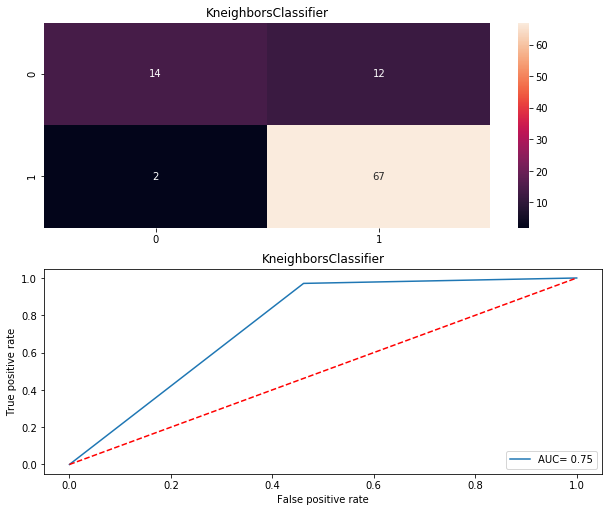

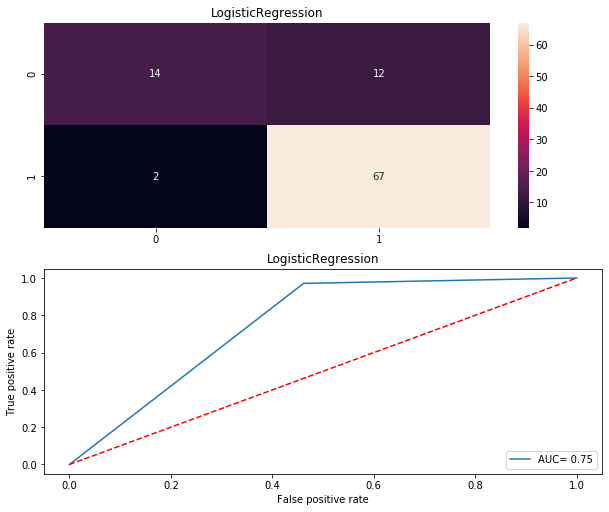

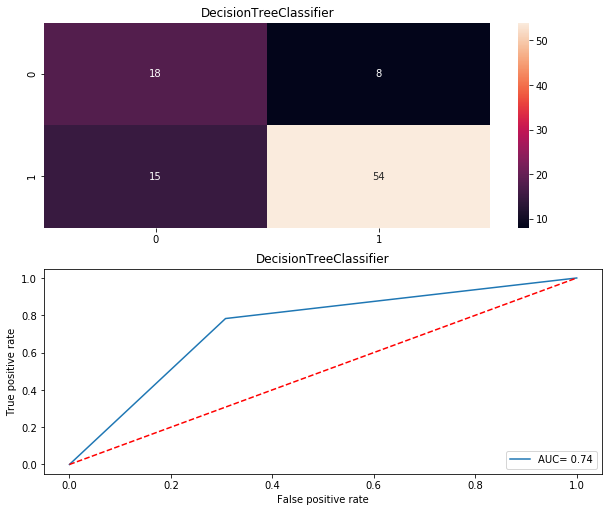

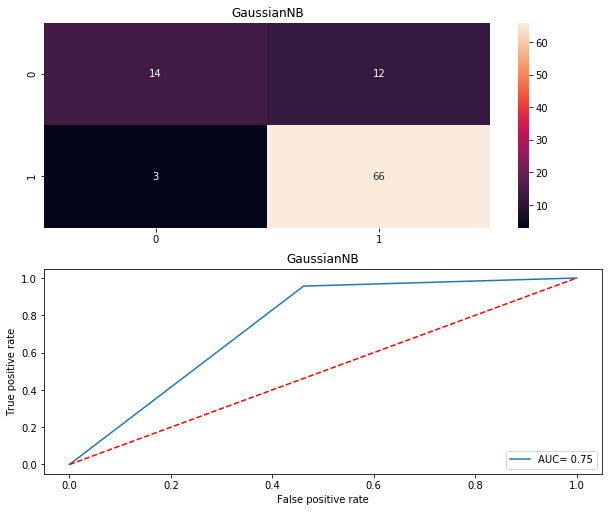

In [228]:
model_list=[]
score=[]
cvs=[]
rocscore=[]

for name, model in models:
    print('*************************',name,'*************************',end='\n\n')
   
    model_list.append(name)
    model.fit(x_train,y_train)
    print(model,end='\n\n')
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score =',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,cds_x,y, cv=10, scoring='accuracy').mean()
    print('cross validation score =',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC= %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    print('\n\n')

In [229]:
result=pd.DataFrame({'Model': model_list, 'Accuracy_score': score, 'Cross_val_score':cvs,'Roc_auc_score': rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_score
0,KneighborsClassifier,85.263158,68.222518,75.473802
1,LogisticRegression,85.263158,81.068262,75.473802
2,DecisionTreeClassifier,75.789474,69.667553,73.745819
3,GaussianNB,84.210526,80.004433,74.749164


Other models

In [230]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100,random_state=42)#100 is defualt
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7157894736842105
[[15 11]
 [16 53]]
              precision    recall  f1-score   support

           0       0.48      0.58      0.53        26
           1       0.83      0.77      0.80        69

    accuracy                           0.72        95
   macro avg       0.66      0.67      0.66        95
weighted avg       0.73      0.72      0.72        95



In [231]:
from sklearn.ensemble import AdaBoostClassifier
# AdaBoostClassifier(base_estimator=DecisionTreeClassifier()
#,n_estimators=50,Learning_rate=1.0)
ad= AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8526315789473684
[[14 12]
 [ 2 67]]
              precision    recall  f1-score   support

           0       0.88      0.54      0.67        26
           1       0.85      0.97      0.91        69

    accuracy                           0.85        95
   macro avg       0.86      0.75      0.79        95
weighted avg       0.86      0.85      0.84        95



I choose the AdaboostClassifier model as my final model because it gives the best scores.

Accuracy score = 85.3
Precision = 88.0
Recall = 54.0

# Save the model

In [232]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(ad,'Loan.pkl')

['Loan.pkl']

In [233]:
# Load and use model to make a prediction
model=joblib.load('Loan.pkl')
model.predict(x_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1])